In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import simple_graph as gs
import Homework04 as gss

In [2]:
img_size=  (480, 640) 

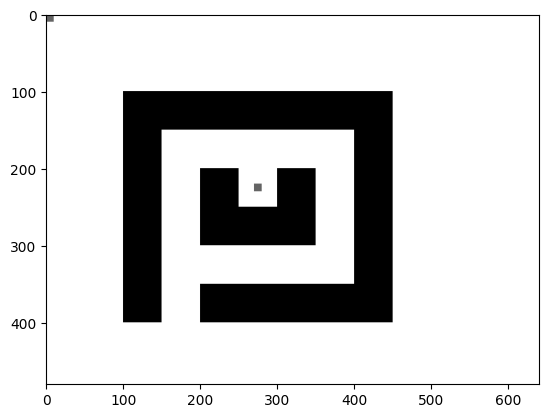

In [3]:
obstacle_1 = np.ones(img_size, dtype=np.uint8)*255
obstacle_1[100:150, 100:450] = 0
obstacle_1[150:400, 150:150] = 0
obstacle_1[150:400, 400:450] = 0
obstacle_1[350:400, 200:400] = 0
obstacle_1[100:400, 100:150] = 0
obstacle_1[200:300, 200:250] = 0
obstacle_1[250:300, 250:300] = 0
obstacle_1[200:300, 300:350] = 0
obstacle_1[220: 230, 270: 280] = 100
obstacle_1[0: 10, 0: 10] = 100
plt.imshow(obstacle_1, cmap='gray')

In [4]:
obstacle_1[0: 10, 0:10]

array([[100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100],
       [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]], dtype=uint8)

In [20]:
left, right = np.arange(0, img_size[1], 10), np.arange(10, img_size[1]+10, 10)
graph = []

In [ ]:
h = 0
for i in range(img_size[0]):
    for j in range(img_size[1]):
        if obstacle_1[i,j] != 0:
            graph.append(gs.Node(h, i, j))
        else:
            graph.append(None)
        if ((640*i)+j)%640!=0 and graph[h-1]:
            graph[h-1].addUndirectedNeighbor(graph[h])
        if i!=0 and graph[640*(i-1)+j]:
            graph[h].addUndirectedNeighbor(graph[640*(i-1)+j])
        h+=1

In [22]:
len(graph)

1280

In [ ]:
graph[640].neighbors()[1].id()

641

: 

In [21]:
print("Graph:")
for node in graph:
    s = "["
    for n in node.neighbors():
        s += str(n) + ", "
    s += "]"
    print(node, s)
    
print(graph[2].pre())

Graph:
0 (0, 10) inf -> -1 []
1 (0, 20) inf -> -1 []
2 (0, 30) inf -> -1 []
3 (0, 40) inf -> -1 []
4 (0, 50) inf -> -1 []
5 (0, 60) inf -> -1 []
6 (0, 70) inf -> -1 []
7 (0, 80) inf -> -1 []
8 (0, 90) inf -> -1 []
9 (0, 100) inf -> -1 []
10 (0, 110) inf -> -1 []
11 (0, 120) inf -> -1 []
12 (0, 130) inf -> -1 []
13 (0, 140) inf -> -1 []
14 (0, 150) inf -> -1 []
15 (0, 160) inf -> -1 []
16 (0, 170) inf -> -1 []
17 (0, 180) inf -> -1 []
18 (0, 190) inf -> -1 []
19 (0, 200) inf -> -1 []
20 (0, 210) inf -> -1 []
21 (0, 220) inf -> -1 []
22 (0, 230) inf -> -1 []
23 (0, 240) inf -> -1 []
24 (0, 250) inf -> -1 []
25 (0, 260) inf -> -1 []
26 (0, 270) inf -> -1 []
27 (0, 280) inf -> -1 []
28 (0, 290) inf -> -1 []
29 (0, 300) inf -> -1 []
30 (0, 310) inf -> -1 []
31 (0, 320) inf -> -1 []
32 (0, 330) inf -> -1 []
33 (0, 340) inf -> -1 []
34 (0, 350) inf -> -1 []
35 (0, 360) inf -> -1 []
36 (0, 370) inf -> -1 []
37 (0, 380) inf -> -1 []
38 (0, 390) inf -> -1 []
39 (0, 400) inf -> -1 []
40 (0, 410) 

In [16]:
for i in range(img_size[0]//10):
    for j in range(len(left)):
        
        if left[i]>= 100 and right[i] <= 150 and left[j]>= 100 and right[j] <= 450:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0))
            continue
        elif left[i]>= 150 and right[i] <= 400 and left[j]>= 150 and right[j] <= 150:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0))
            continue
        elif left[i]>= 150 and right[i] <= 400 and left[j]>= 400 and right[j] <= 450:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0))
            continue
        elif left[i]>= 350 and right[i] <= 400 and left[j]>= 200 and right[j] <= 400:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0 ))
            continue
        elif left[i]>= 100 and right[i] <= 400 and left[j]>= 100 and right[j] <= 150:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j] , 0))
            continue
        elif left[i]>= 200 and right[i] <= 300 and left[j]>= 200 and right[j] <= 250:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0  ))
            continue
        elif left[i]>= 250 and right[i] <= 300 and left[j]>= 250 and right[j] <= 300:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0))
            continue
        elif left[i]>= 200 and right[i] <= 300 and left[j]>= 300 and right[j] <= 350:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 0))
            continue


        if ((64*i)+j)%64==0:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 1))
        else:
            graph.append(gs.Node((64*i)+j, left[i], right[i], left[j], right[j], 1))
            graph[(64*i)+j-1].addUndirectedNeighbor(graph[(64*i)+j])   
        
        if i!=0:
            graph[(64*i)+j].addUndirectedNeighbor(graph[64*(i-1)+j])

In [15]:
print("Graph:")
for node in graph:
    s = "["
    if node.val() == 0:
        for n in node.neighbors():
            s += str(n) + ", "
        s += "]"
        print(node, s)
    
print(graph[2].pre())

Graph:


AttributeError: 'Node' object has no attribute 'val'

In [18]:
print(graph[1435])

1435 (220, 230, 270, 280) inf -> -1


In [19]:
print(graph[1435])

1435 (220, 230, 270, 280) inf -> -1


In [20]:
48*64

3072

In [21]:
gss.bfs(graph, verbose=False)

In [22]:
graph[1435].visited()

True

In [23]:
node = graph[1435]
while node.parent()!=-1:
    # print(node.parent().id())
    node = node.parent()
    x1, y1, x2, y2 = node.get_coordinates()
    # print(y1, y2, x1, x2)
    obstacle_1[y1:y2, x1:x2] = 70
    

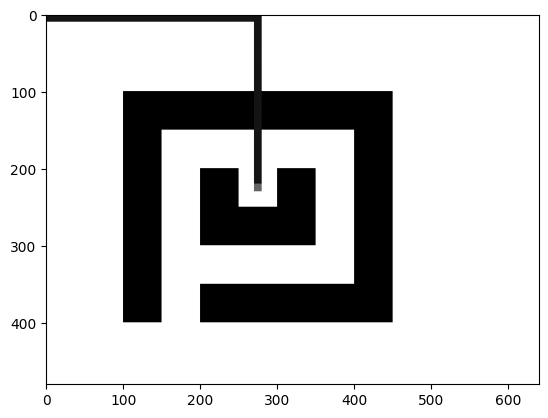

In [14]:
plt.imshow(obstacle_1, cmap='gray')

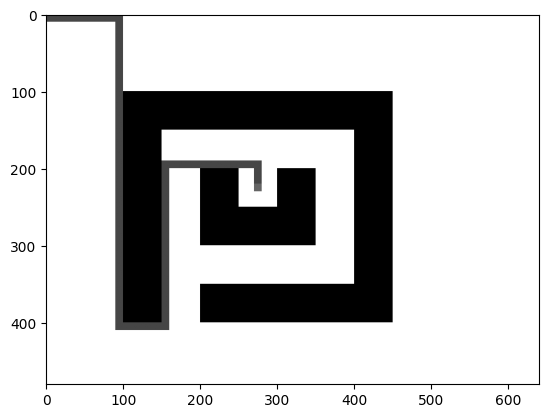

In [24]:
plt.imshow(obstacle_1, cmap='gray')